<a href="https://colab.research.google.com/github/Nadezda-Sut/EEG/blob/main/MNE_Connectivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install mne



In [4]:
!pip install autoreject

In [28]:

!pip install -U mne-connectivity

In [29]:
import matplotlib
import pathlib
import mne
import pandas as pd
import numpy as np
from autoreject  import AutoReject
ar = AutoReject()
from mne_connectivity import spectral_connectivity_epochs



In [ ]:
#main_folder = pathlib.Path().cwd()

#input_folder = pathlib.Path('D:/eeg_connectivity')
#output_folder = pathlib.Path('D:/eeg_connectivity/output')



#files = [file for file in input_folder.iterdir() if file.suffix == '.fif']

#files = 'D:/eeg_connectivity/VatEvgDoICA.set'


In [30]:
from google.colab import drive
drive.mount('/content/gdrive')


# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.set"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
input_file = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.set'
output_file = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif'

# Read the EEG data from the input file
raw = mne.io.read_raw_eeglab(input_file, preload=True)

# Save the EEG data to the output file in FIF format
raw.save(output_file, overwrite=True)

Reading /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fdt
Reading 0 ... 61924  =      0.000 ...   241.891 secs...
Overwriting existing file.
Writing /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif


<ipython-input-31-664dc7b7bada>:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(input_file, preload=True)
<ipython-input-31-664dc7b7bada>:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(input_file, preload=True)
<ipython-input-31-664dc7b7bada>:8: RuntimeWarning: This filename (/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_file, overwrite=True)


Closing /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif
[done]


In [33]:
file = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif'

# Convert .ced to .csv

In [34]:
import csv
import re

def convert_ced_to_csv(ced_file, csv_file):
    # Open the .ced file for reading
    with open(ced_file, 'r') as ced:
        # Create a CSV writer object
        csv_writer = csv.writer(csv_file)

        # Write the header row
        csv_writer.writerow(["Electrode Label", "X", "Y", "Z"])

        # Read the .ced file line by line
        for line in ced:
            # Parse the electrode label and coordinates from each line
            match = re.match(r'(\w+)\s+([\d.-]+)\s+([\d.-]+)\s+([\d.-]+)', line)
            if match:
                electrode_label = match.group(1)
                x_coord = match.group(2)
                y_coord = match.group(3)
                z_coord = match.group(4)

                # Write the electrode information as a row in the CSV file
                csv_writer.writerow([electrode_label, x_coord, y_coord, z_coord])

# Example usage: Convert example.ced to example.csv
ced_file = '/content/gdrive/My Drive/Colab Notebooks/Channels.ced'
csv_file = '/content/gdrive/My Drive/Colab Notebooks/Channels.csv'

with open(csv_file, 'w', newline='') as output_csv:
    convert_ced_to_csv(ced_file, output_csv)

In [35]:
montage = mne.channels.read_custom_montage("/content/gdrive/My Drive/Colab Notebooks/Channels.csv")

In [36]:
epochs_duration = 3.
epochs_overlap = 0.5

con_methods = ['wpli']
#, 'imcoh', 'ciplv', 'ppc', 'coh'
con_freqs = ['4-30','4-8','8-13','13-20', '20-30', '8-10', '10-13']

In [37]:
freqs_min = [int(x.split('-')[0]) for x in con_freqs]
freqs_max = [int(x.split('-')[1]) for x in con_freqs]
sen_or_sour = 'sensors'

In [38]:
def epoching(raw, duration, overlap):
  tmin = 0
  tmax = duration
  duration = duration - overlap
  events=mne.make_fixed_length_events(raw, id=1,duration=duration)
  picks = mne.pick_types( raw.info , meg=False, eeg=True, eog=False)
  epochs = mne.Epochs(raw, events=events, tmin=tmin, baseline = (0, 0),
                      tmax=tmax, picks=picks, reject_by_annotation=True)
  epochs.drop_bad()
  return epochs


In [39]:
raw = mne.io.read_raw_fif(file, preload=True)

Opening raw data file /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif...
    Range : 0 ... 61924 =      0.000 ...   241.891 secs
Ready.
Reading 0 ... 61924  =      0.000 ...   241.891 secs...


<ipython-input-39-8f81574964f6>:1: RuntimeWarning: This filename (/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


In [40]:
epochs = epoching(raw,4.,0.5)


Not setting metadata
69 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 1025 original time points ...
1 bad epochs dropped


In [57]:
output_folder = pathlib.Path('/content/gdrive/My Drive/Colab Notebooks')

In [58]:
person = 'VatEvgDo_matrix'
freqs = raw.info['sfreq']

In [59]:
def calculate_conn(data, con_methods, sfreq, freqs_min, freqs_max, node_names, person, output_folder):

    for con_method in con_methods:
        con = spectral_connectivity_epochs(data, method = con_methods,
                                                                                       mode = 'multitaper',
                                                                                       sfreq=sfreq, fmin=freqs_min,
                                                                                       fmax = freqs_max, faverage = True,
                                                                                       mt_adaptive = True, n_jobs = -1)
        con = con.get_data(output='dense')

    for shp in range(0, con.shape[2]):
        output_filename = f'{output_folder}/{person}_{sen_or_sour}_{con_method}.csv'
        savefile = pd.DataFrame(np.array(con[:,:,shp]))
        savefile.columns = savefile.index = node_names

        savefile.to_csv(output_filename)



In [60]:
calculate_conn(epochs, con_methods, epochs.info['sfreq'], freqs_min, freqs_max, epochs.info['ch_names'], person, output_folder)

Replacing existing metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1596 connections
    using t=0.000s..4.000s for estimation (1025 points)
    computing connectivity for the bands:
     band 1: 4.2Hz..30.0Hz (104 points)
     band 2: 4.2Hz..8.0Hz (16 points)
     band 3: 8.2Hz..13.0Hz (20 points)
     band 4: 13.2Hz..20.0Hz (28 points)
     band 5: 20.2Hz..30.0Hz (40 points)
     band 6: 8.2Hz..10.0Hz (8 points)
     band 7: 10.2Hz..13.0Hz (12 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 2..2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 3..3
    computing connectivity for epochs 4..4


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 5..5
    computing connectivity for epochs 6..6


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 7..7
    computing connectivity for epochs 8..8


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 9..9
    computing connectivity for epochs 10..10


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 11..11
    computing connectivity for epochs 12..12


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 13..13
    computing connectivity for epochs 14..14


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 15..15
    computing connectivity for epochs 16..16


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 17..17
    computing connectivity for epochs 18..18


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 19..19
    computing connectivity for epochs 20..20


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 21..21
    computing connectivity for epochs 22..22


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 23..23
    computing connectivity for epochs 24..24


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 25..25
    computing connectivity for epochs 26..26


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 27..27
    computing connectivity for epochs 28..28


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 29..29
    computing connectivity for epochs 30..30


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 31..31
    computing connectivity for epochs 32..32


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 33..33
    computing connectivity for epochs 34..34


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 35..35
    computing connectivity for epochs 36..36


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 37..37
    computing connectivity for epochs 38..38


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 39..39
    computing connectivity for epochs 40..40


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 41..41
    computing connectivity for epochs 42..42


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 43..43
    computing connectivity for epochs 44..44


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 45..45
    computing connectivity for epochs 46..46


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 47..47
    computing connectivity for epochs 48..48


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 49..49
    computing connectivity for epochs 50..50


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 51..51
    computing connectivity for epochs 52..52


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 53..53


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 54..54


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 55..55
    computing connectivity for epochs 56..56


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 57..57
    computing connectivity for epochs 58..58


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 59..59
    computing connectivity for epochs 60..60


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 61..61
    computing connectivity for epochs 62..62


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 63..63
    computing connectivity for epochs 64..64


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 65..65
    computing connectivity for epochs 66..66


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 67..67
    computing connectivity for epochs 68..68


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    assembling connectivity matrix
[Connectivity computation done]


In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [61]:
import os

# Assuming the file is a CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'

# Read the CSV file into a DataFrame
con = pd.read_csv(file_path, index_col=0)

# Create a graph from the weighted adjacency matrix
G = nx.from_numpy_array(con.values)



In [62]:
print(G)

Graph with 57 nodes and 1596 edges


In [64]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)

# Transitivity
transitivity = nx.transitivity(G)

# Efficiency
efficiency = nx.global_efficiency(G)

# Modularity
#modularity = nx.community.modularity(nx.community.greedy_modularity_communities(G), G)

# Density
density = nx.density(G)

# Print or use the results as needed
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Assortativity:", assortativity)
print("Transitivity:", transitivity)
print("Efficiency:", efficiency)
#print("Modularity:", modularity)
print("Density:", density)

Degree Centrality: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0}
Betweenness Centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51:

In [65]:
import os
import numpy as np
import pandas as pd
import networkx as nx

# Assuming the file is a CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'

# Read the CSV file into a DataFrame
con = pd.read_csv(file_path, index_col=0)

# Create a graph from the weighted adjacency matrix
G = nx.from_numpy_array(con.values)

# Calculate global graph metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
assortativity = nx.degree_assortativity_coefficient(G)
transitivity = nx.transitivity(G)
average_clustering = nx.average_clustering(G)
density = nx.density(G)

# Print or use the results as needed
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("Assortativity:", assortativity)
print("Transitivity:", transitivity)
print("Average Clustering:", average_clustering)
print("Density:", density)


Degree Centrality: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0}
Betweenness Centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51:

/usr/local/lib/python3.10/dist-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


In [69]:
import pandas as pd
import networkx as nx
import numpy as np

# Load the matrix from CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
matrix = pd.read_csv(file_path, index_col=0)

# Convert the DataFrame to a NumPy array for compatibility with NetworkX
adjacency_matrix = matrix.to_numpy()

# Create a graph from the adjacency matrix
graph = nx.Graph(adjacency_matrix)

# Calculate node degrees
node_degrees = dict(graph.degree())

# Calculate network density
density = nx.density(graph)

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(graph)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(graph)

# Calculate modularity
modularity = nx.community.modularity_max.greedy_modularity_communities(graph)

# Calculate graph diameter
diameter = nx.diameter(graph)

# Calculate connected components
connected_components = list(nx.connected_components(graph))

# Display the results
print("Node Degrees:", node_degrees)
print("Network Density:", density)
print("Clustering Coefficient:", clustering_coefficient)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("Modularity:", modularity)
print("Graph Diameter:", diameter)
print("Connected Components:", connected_components)


Node Degrees: {0: 56, 1: 56, 2: 56, 3: 56, 4: 56, 5: 56, 6: 56, 7: 56, 8: 56, 9: 56, 10: 56, 11: 56, 12: 56, 13: 56, 14: 56, 15: 56, 16: 56, 17: 56, 18: 56, 19: 56, 20: 56, 21: 56, 22: 56, 23: 56, 24: 56, 25: 56, 26: 56, 27: 56, 28: 56, 29: 56, 30: 56, 31: 56, 32: 56, 33: 56, 34: 56, 35: 56, 36: 56, 37: 56, 38: 56, 39: 56, 40: 56, 41: 56, 42: 56, 43: 56, 44: 56, 45: 56, 46: 56, 47: 56, 48: 56, 49: 56, 50: 56, 51: 56, 52: 56, 53: 56, 54: 56, 55: 56, 56: 56}
Network Density: 1.0
Clustering Coefficient: 1.0
Betweenness Centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0

In [54]:
file_matrix = '/content/gdrive/My Drive/Colab Notebooks/a.csv'
file_labels = '/content/gdrive/My Drive/Colab Notebooks/electrodes.csv'

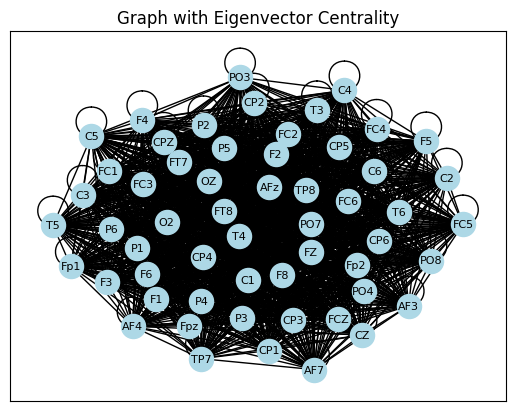

In [ ]:
# Load adjacency matrix from CSV file
adjacency_matrix = np.loadtxt(file_matrix, delimiter=',', skiprows=1)

# Load electrode labels from CSV file
try:
    electrode_labels = pd.read_csv(file_labels)['electrode_labels'].tolist()
except KeyError as e:
    print(f"Error: Column '{e.args[0]}' not found in the electrode labels CSV file.")
    exit(1)

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Set the electrode labels as node attributes
labels = {i: label for i, label in enumerate(electrode_labels)}
nx.set_node_attributes(G, labels, 'label')

# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality(G)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_color='lightblue')
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=8)
plt.title("Graph with Eigenvector Centrality")
plt.show()

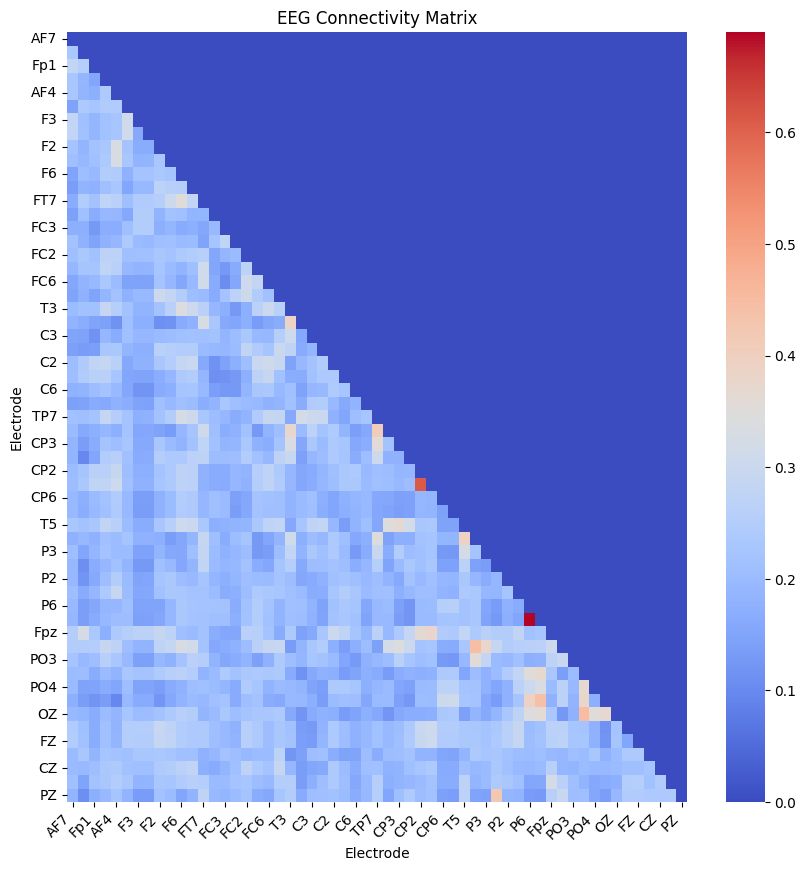

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the connectivity matrix from the CSV file
connectivity_file = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_data = pd.read_csv(connectivity_file, index_col=0)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the connectivity matrix as a heatmap
sns.heatmap(connectivity_data, cmap='coolwarm', ax=ax)

# Set x-axis and y-axis labels
ax.set_xlabel('Electrode')
ax.set_ylabel('Electrode')

# Set plot title
ax.set_title('EEG Connectivity Matrix')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()
